۱) در ابتدا سعی کنید با کمک کتابخانه‌های موجود ( تابع describe ) شهود کلی از هر کدام از ویژگی‌ها بدست آورید. ( میانگین، کمینه، بیشینه و … ویژگی‌های عددی را 

بدست آورید.

۲) در این مرحله می‌بایست داده‌های گمشده (Missing Values) را پر کنیم.

دو استراتژی برای انجام این کار در پیش بگیرید. استراتژی اول، پر کردن به صورت تصادفی از مقادیر موجود و استراتژی دوم پر کردن با استفاده از داده‌های با بیشترین تکرار است. (mode)

۳) در این مرحله، توزیع دیتاست آموزشی را در تمامی ویژگی‌ها بر اساس برچسب رسم کنید.

۴) حالا میخواهیم ویژگی‌های categorical را به داده‌های عددی تبدیل کنیم. با استفاده از الگوریتم‌های مختلف، این کار را انجام دهید.

۵) ماتریس correlation را برای ویژگی‌های مختلف و برچسب دیتاست آموزشی بدست آورید.

۶) حالا بر اساس دیتاست بدست آمده، مدل‌های SVM، KNN و Logistic Regression را امتحان کرده و معیارهای دقت مدل‌های خود را گزارش کنید.

# Install pakcages & Read File

In [1]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Link: 

https://docs.google.com/spreadsheets/d/1wV3qg-i_Aw58lqpM1-pqsd5Exq3OTSChqhF24_Fl3ic/edit#gid=668697557

In [2]:
sheet_id = '1wV3qg-i_Aw58lqpM1-pqsd5Exq3OTSChqhF24_Fl3ic'
sheet_name = 'Online-shopping'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0.0,NaN,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False


# 1. Describe

In [5]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nUnique values :  \n", df.nunique())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.isnull().sum())

Rows     :  12330
Columns  :  18

Features : 
 ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

Unique values :  
 Administrative               27
Administrative_Duration    3313
Informational                17
Informational_Duration     1255
ProductRelated              310
ProductRelated_Duration    9450
BounceRates                1859
ExitRates                  4739
PageValues                 2674
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

Missing values :   2096

Unique values :  
 Adminis

In [6]:
df.shape


(12330, 18)

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12215.000000,12225.000000,12196.000000,12204.000000,12196.000000,12191.000000,12216.000000,12208.000000,12222.000000,12201.000000,12214.000000,12218.000000,12204.000000,12179.000000
mean,2.315759,80.741179,0.502706,34.733067,31.814447,1192.220406,0.022231,0.043050,5.869171,0.061011,2.124857,2.358324,3.146673,4.069464
std,3.319969,176.660783,1.271342,141.364602,44.607472,1905.738105,0.048569,0.048543,18.545277,0.198111,0.912112,1.716343,2.401164,4.030383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.050000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,598.450000,0.003098,0.025183,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.750000,0.000000,0.000000,38.000000,1464.986002,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12215 non-null  float64
 1   Administrative_Duration  12225 non-null  float64
 2   Informational            12196 non-null  float64
 3   Informational_Duration   12204 non-null  float64
 4   ProductRelated           12196 non-null  float64
 5   ProductRelated_Duration  12191 non-null  float64
 6   BounceRates              12216 non-null  float64
 7   ExitRates                12208 non-null  float64
 8   PageValues               12222 non-null  float64
 9   SpecialDay               12201 non-null  float64
 10  Month                    12212 non-null  object 
 11  OperatingSystems         12214 non-null  float64
 12  Browser                  12218 non-null  float64
 13  Region                   12204 non-null  float64
 14  TrafficType           

In [9]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                    float64
Region                     float64
TrafficType                float64
VisitorType                 object
Weekend                     object
Revenue                       bool
dtype: object

In [10]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

# 2.Missing Values

Drop Duplicate Values 

In [11]:
df.duplicated().sum()

99

In [12]:
df_duplicate =df.drop_duplicates()

In [13]:
df_duplicate.duplicated().sum()

0

**Find Nan Values**

In [14]:
df_duplicate.isna().sum()

Administrative             114
Administrative_Duration    105
Informational              134
Informational_Duration     126
ProductRelated             134
ProductRelated_Duration    139
BounceRates                114
ExitRates                  122
PageValues                 108
SpecialDay                 129
Month                      118
OperatingSystems           116
Browser                    112
Region                     126
TrafficType                151
VisitorType                116
Weekend                    131
Revenue                      0
dtype: int64

In [15]:
df_duplicate.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0.0,NaN,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False


**Replace Nan Values with Random Variable**

In [16]:
import random

In [17]:
df_miss_random = df_duplicate.copy()
df_miss_random = df_miss_random.fillna(value = np.random.choice(len(df_miss_random)))
df_miss_random.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [18]:
df_miss_random.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,10303.00,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0.0,10303.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False


**Replace Nan Values with Mode Values**

In [19]:
df_miss_mode = df_duplicate.copy()
df_miss_mode.fillna(df_miss_mode.mode().iloc[0], inplace = True) ## convert df_miss_mode to a series
df_miss_mode.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [20]:
df_miss_mode.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.00,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False


# 3. Dataset Graph

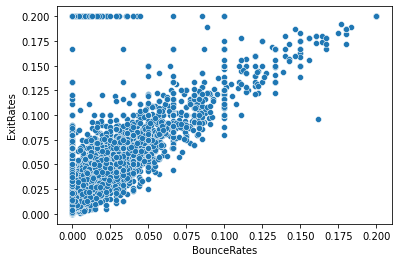

In [21]:
sns.scatterplot(x =df_miss_mode['BounceRates'],	y =df_miss_mode['ExitRates'])

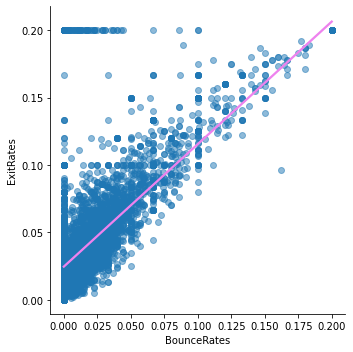

In [22]:
sns.lmplot(x="BounceRates", y="ExitRates", data=df_miss_mode, 
           scatter_kws={'alpha':0.5}, 
           line_kws={'color':'violet'})
plt.show()

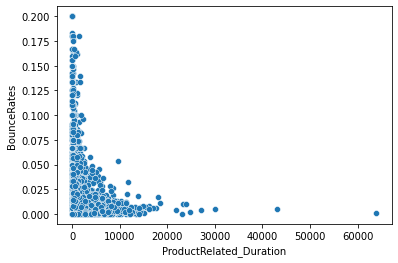

In [23]:
sns.scatterplot(x =df_miss_mode['ProductRelated_Duration'],	y =df_miss_mode['BounceRates'])

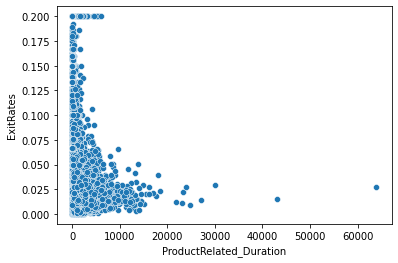

In [24]:
sns.scatterplot(x =df_miss_mode['ProductRelated_Duration'],	y =df_miss_mode['ExitRates'])

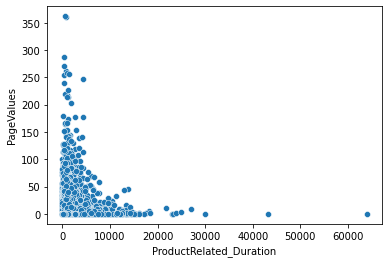

In [25]:
sns.scatterplot(x =df_miss_mode['ProductRelated_Duration'],	y =df_miss_mode['PageValues'])

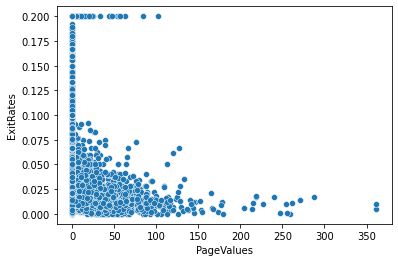

In [26]:
sns.scatterplot(x =df_miss_mode['PageValues'],	y =df_miss_mode['ExitRates'])

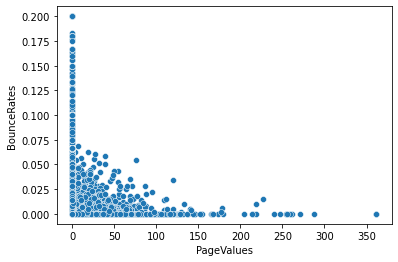

In [27]:
sns.scatterplot(x =df_miss_mode['PageValues'],	y =df_miss_mode['BounceRates'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


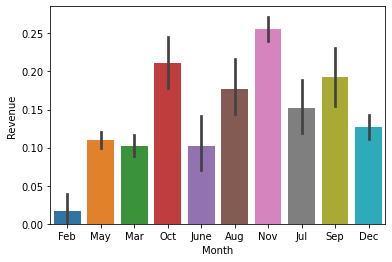

In [28]:
sns.barplot(df_miss_mode["Month"], df_miss_mode["Revenue"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


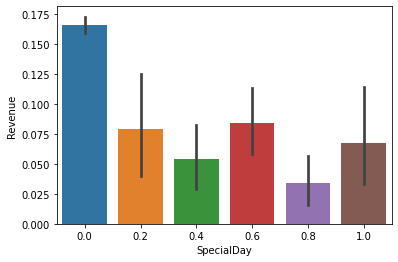

In [29]:
sns.barplot(df_miss_mode["SpecialDay"], df_miss_mode["Revenue"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


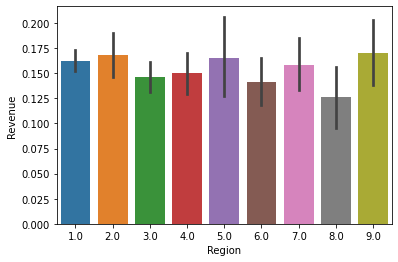

In [30]:
sns.barplot(df_miss_mode["Region"], df_miss_mode["Revenue"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


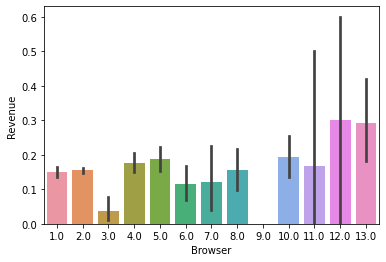

In [31]:
sns.barplot(df_miss_mode["Browser"], df_miss_mode["Revenue"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


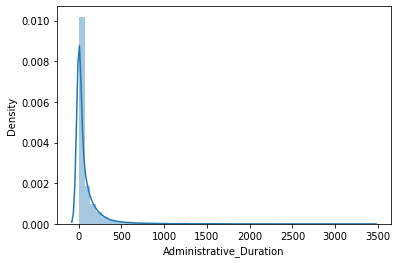

In [32]:

sns.distplot(df_miss_mode["Administrative_Duration"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


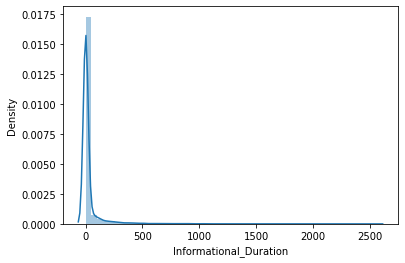

In [33]:
sns.distplot(df_miss_mode["Informational_Duration"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


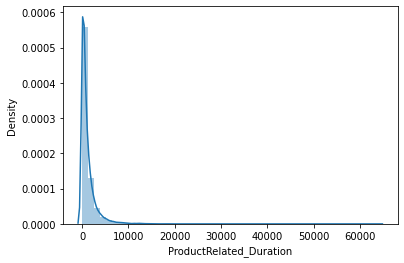

In [34]:
sns.distplot(df_miss_mode["ProductRelated_Duration"])

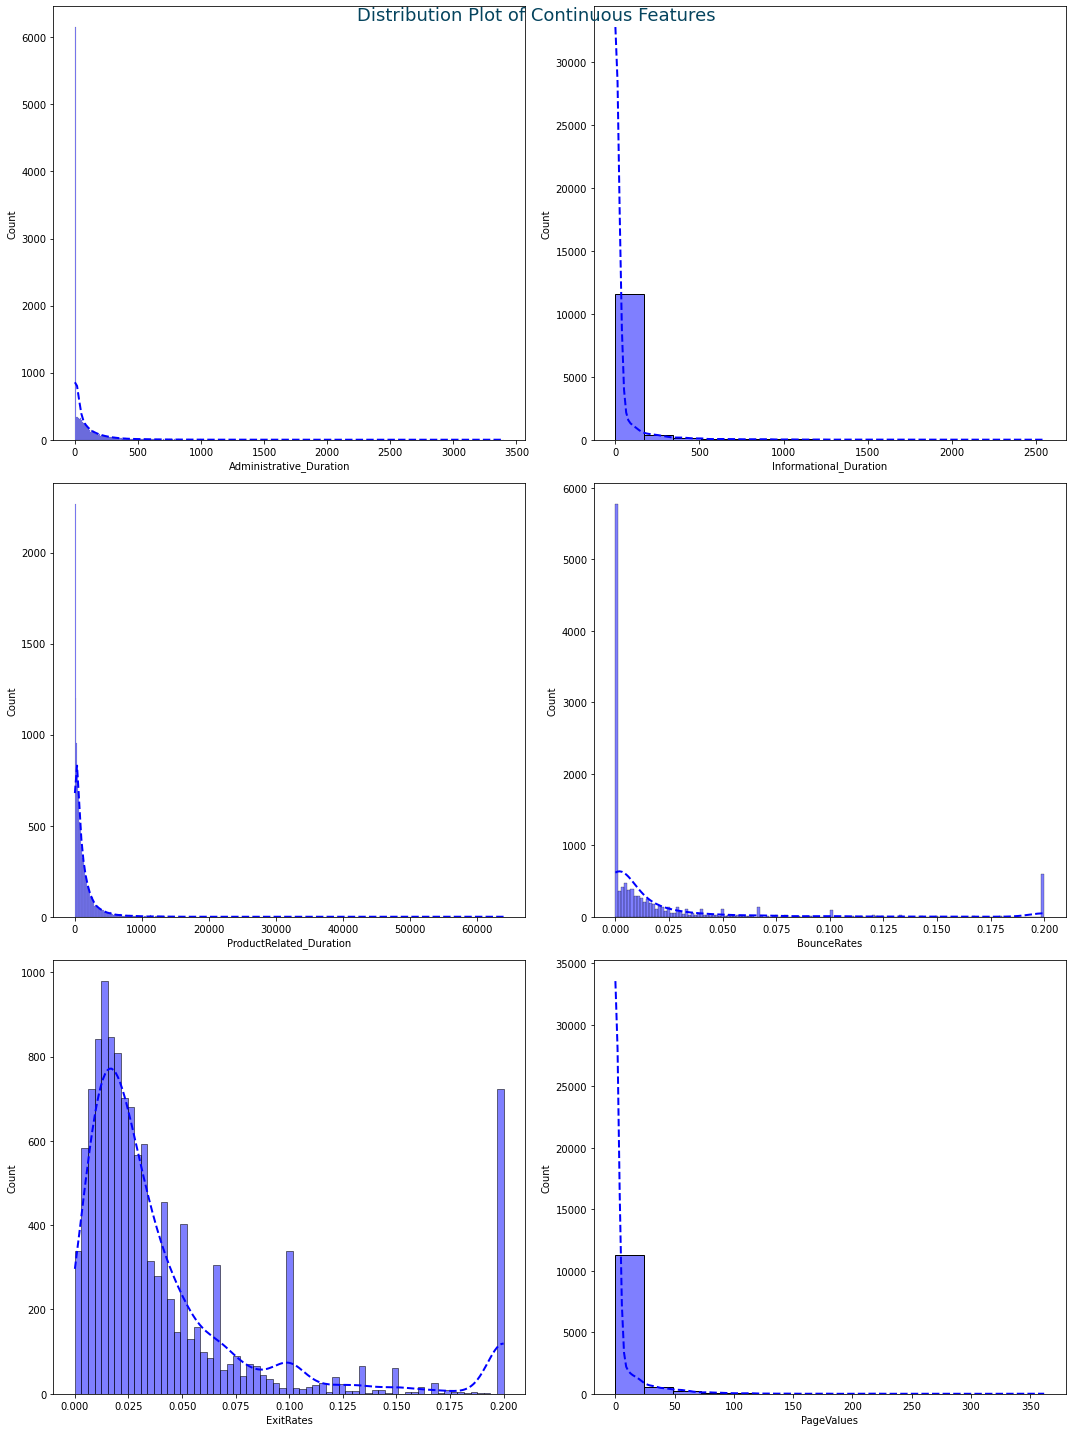

In [35]:
continuous_features = ['Administrative_Duration', 
                       'Informational_Duration', 
                       'ProductRelated_Duration', 
                       'BounceRates', 
                       'ExitRates', 
                       'PageValues']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
axs = np.ravel(axs)
for i, col in enumerate(continuous_features):
    plt.sca(axs[i])
    sns.histplot(data=df_miss_mode, x=col, kde=True, line_kws={'lw':2, 'ls':'--'}, color='Blue')

plt.suptitle("Distribution Plot of Continuous Features", fontsize=18, color='#05445E', va='bottom')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


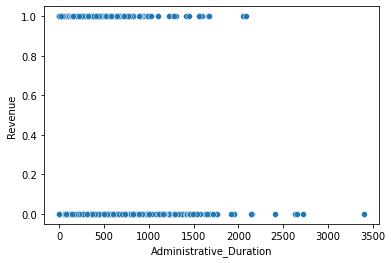

In [36]:
sns.scatterplot(df_miss_mode["Administrative_Duration"],df_miss_mode["Revenue"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


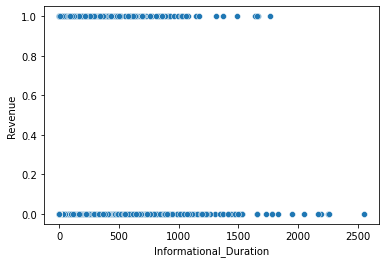

In [37]:
sns.scatterplot(df_miss_mode["Informational_Duration"],df_miss_mode["Revenue"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


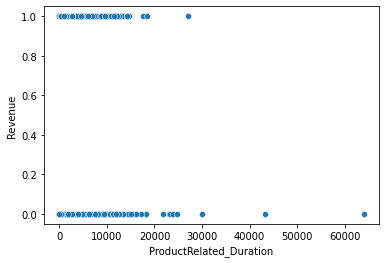

In [38]:
sns.scatterplot(df_miss_mode["ProductRelated_Duration"],df_miss_mode["Revenue"])

In [39]:
data_VisitorType = df_miss_mode.groupby('VisitorType')['VisitorType'].count()

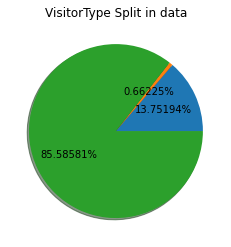

In [40]:
plt.pie(data_VisitorType ,autopct='%1.5f%%',shadow=True);
plt.title('VisitorType Split in data');

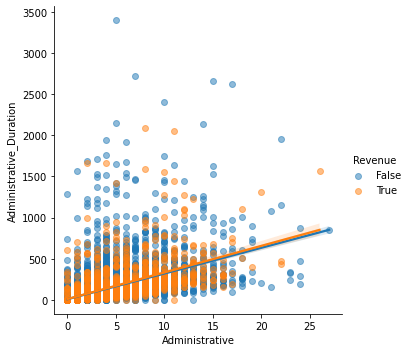

In [41]:
# Impact of Administrative Page Views and Administrative Pageview Duration on Revenue

sns.lmplot(x="Administrative", y="Administrative_Duration", 
           hue='Revenue', data=df_miss_mode, scatter_kws={'alpha':0.5})
plt.show()

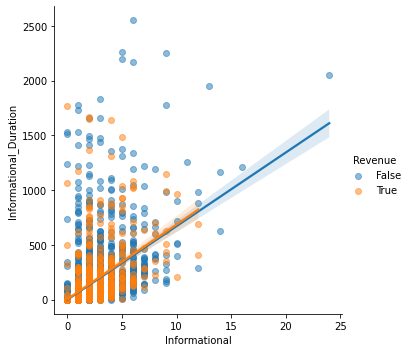

In [42]:
# Impact of Information Page Views and Information Pageview Duration on Revenue

sns.lmplot(x="Informational", y="Informational_Duration", 
           hue='Revenue', data=df_miss_mode, scatter_kws={'alpha':0.5})
plt.show()

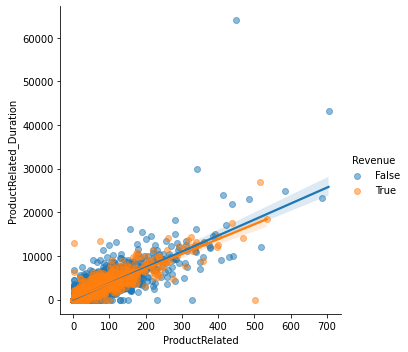

In [43]:
# Impact of ProductRelated Page Views and ProductRelated Pageview Duration on Revenue

sns.lmplot(x="ProductRelated", y="ProductRelated_Duration", 
           hue='Revenue', data=df_miss_mode, scatter_kws={'alpha':0.5})
plt.show()

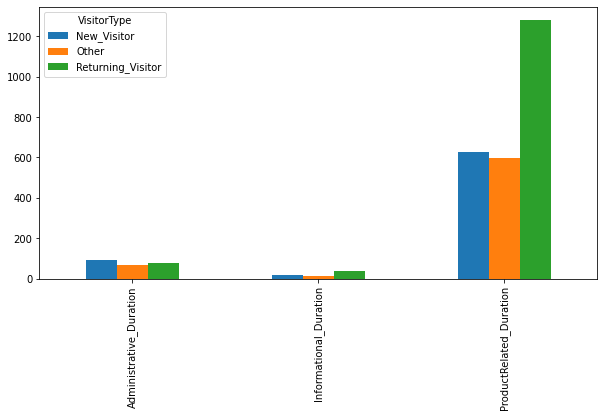

In [44]:
df_pvt=df_miss_mode[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','VisitorType']]
pd.pivot_table(df_pvt, values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],columns=['VisitorType'], aggfunc='mean').plot(kind='bar', figsize=(10, 5))

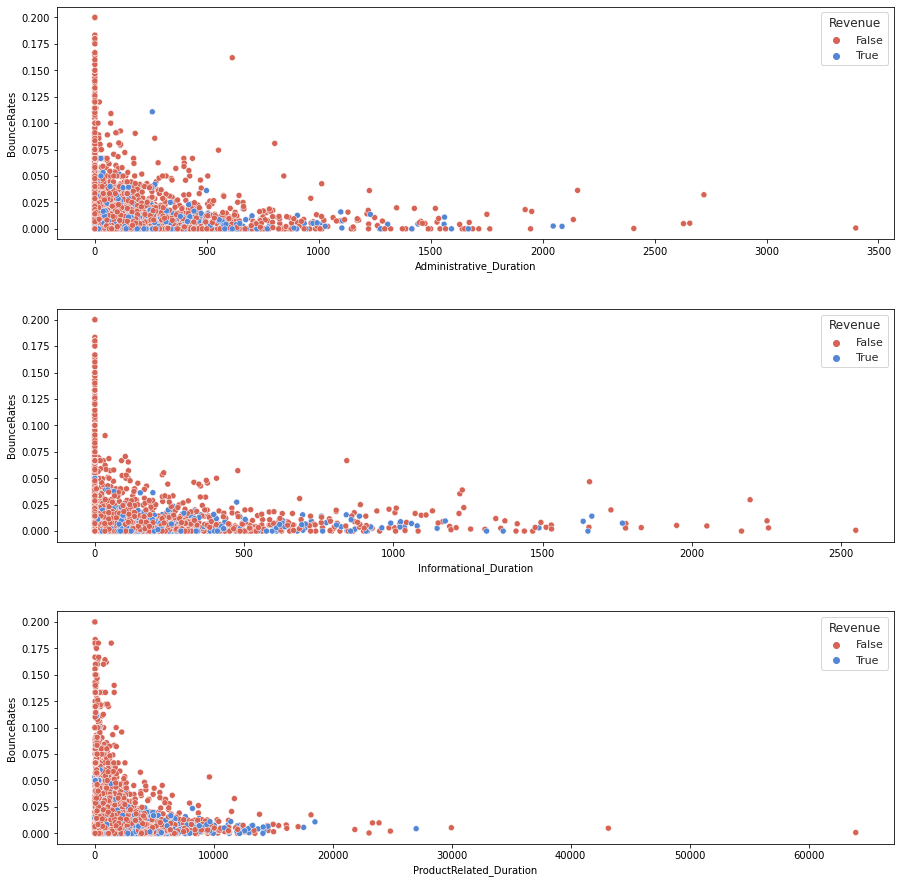

In [45]:
fig, ax = plt.subplots(3,figsize=(15,15))

sns.set(style="ticks")

ax1 = sns.scatterplot(x="Administrative_Duration", y="BounceRates",hue="Revenue",palette = ['#d66354','#5486d6'],  data=df_miss_mode, ax=ax[0])
ax2 = sns.scatterplot(x="Informational_Duration", y="BounceRates",hue="Revenue",palette = ['#d66354','#5486d6'], data=df_miss_mode, ax=ax[1])
ax3 = sns.scatterplot(x="ProductRelated_Duration", y="BounceRates",hue="Revenue",palette = ['#d66354','#5486d6'],  data=df_miss_mode, ax=ax[2])

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

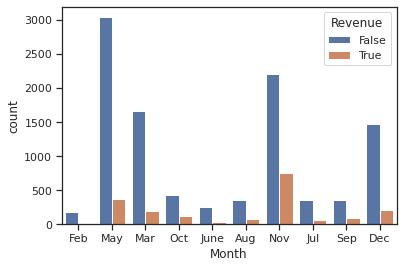

In [46]:
sns.countplot(x="Month", data=df_miss_mode, hue="Revenue")

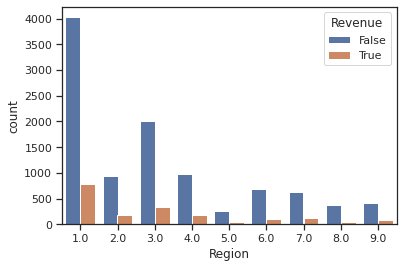

In [47]:
sns.countplot(x="Region", data=df_miss_mode, hue="Revenue")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


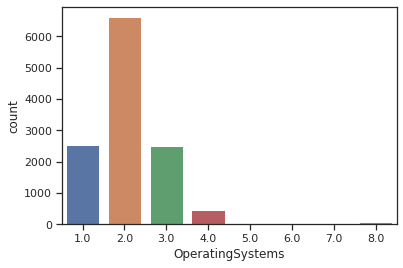

In [48]:
sns.countplot(df_miss_mode["OperatingSystems"])

In [49]:
sns.set()

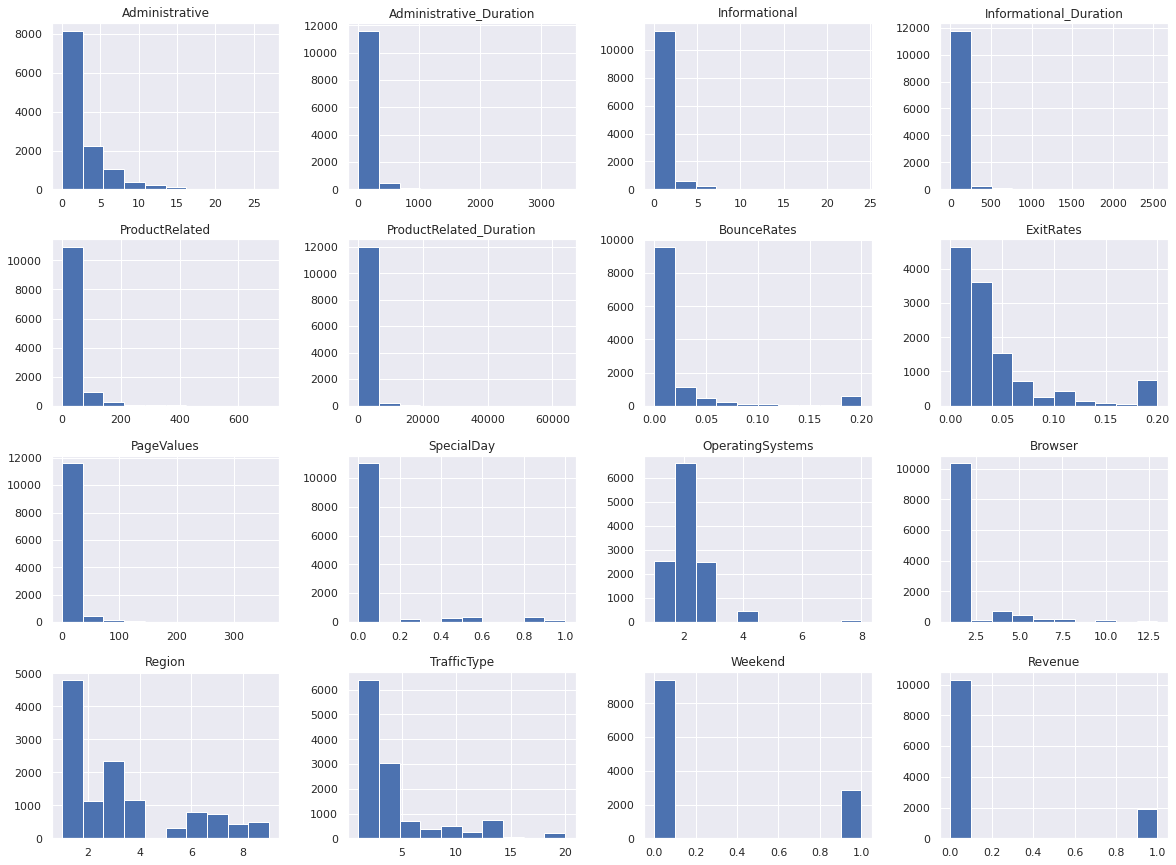

In [50]:
df_histogram = df_miss_mode.copy()
df_histogram['Weekend'] = df_miss_mode['Weekend'].astype(float)
df_histogram['Revenue'] = df_miss_mode['Revenue'].astype(float)
df_histogram.hist(figsize=(20, 15))
plt.show()

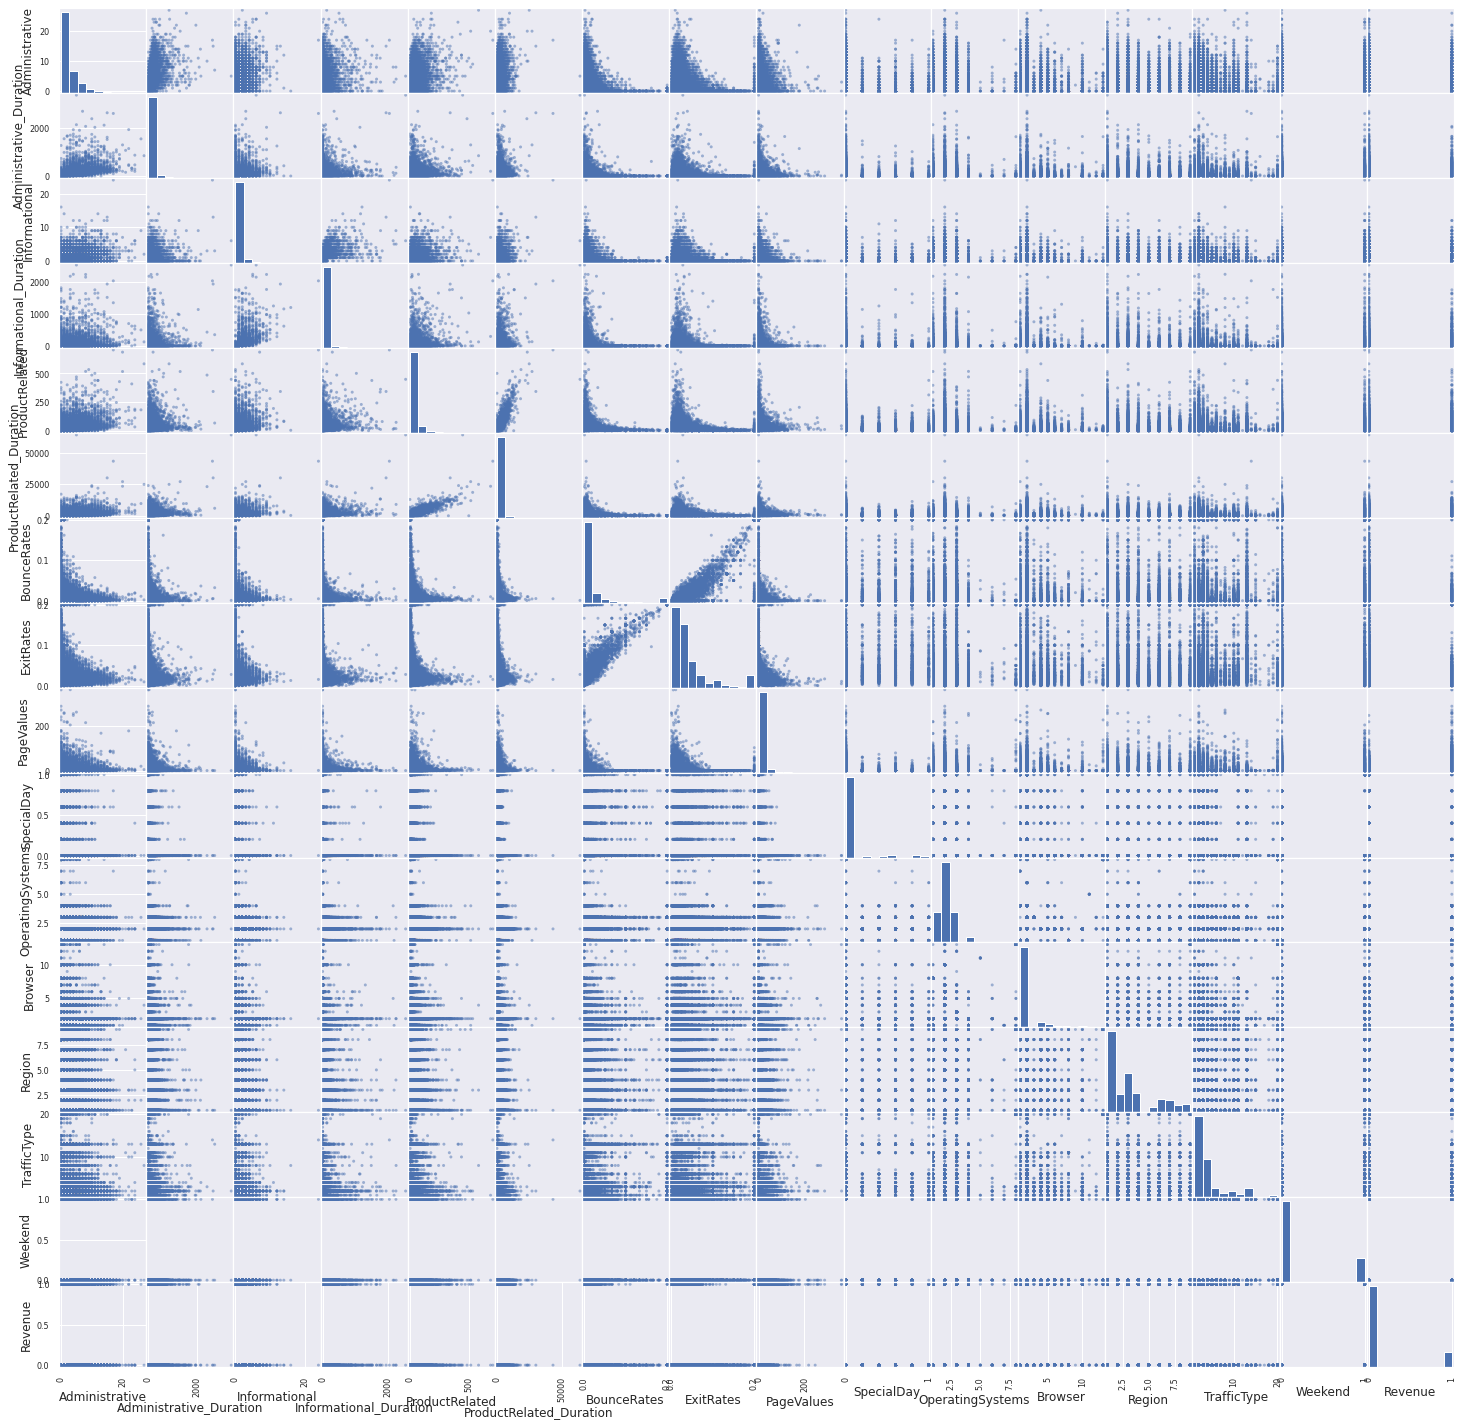

In [51]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_histogram,figsize=(25, 25))
plt.show()

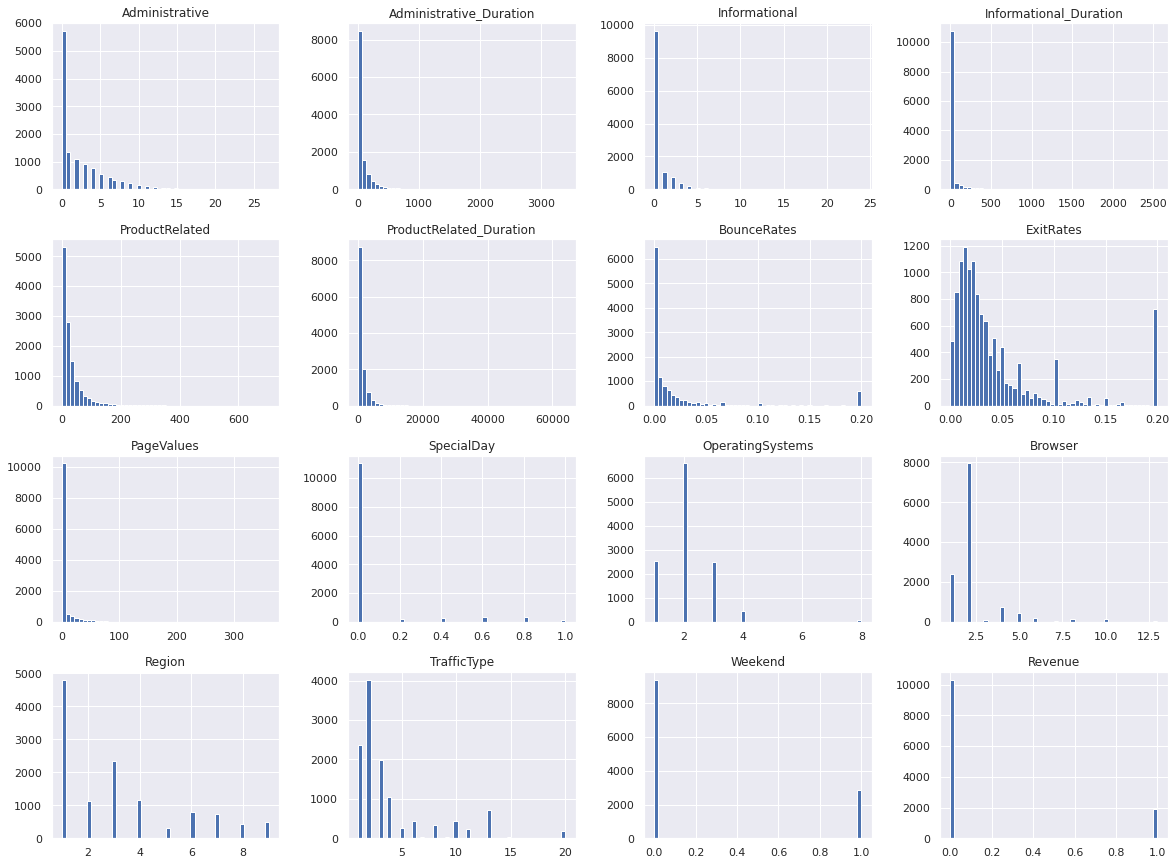

In [52]:
df_histogram.hist(bins=50, figsize=(20,15))
plt.show()

# 4.categorical features

 Get Dummies 

In [53]:
df_random_cat = pd.get_dummies(df_miss_mode,columns=df_miss_mode.columns[[10,15]])


In [54]:
df_mode_cat = pd.get_dummies(df_miss_mode,columns=df_miss_mode.columns[[10,15]])


In [55]:
df_mode_cat.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.00,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


Label Encoder

In [56]:
from sklearn.preprocessing import OrdinalEncoder

In [57]:
# define encoder
encoder = OrdinalEncoder()

In [58]:
df_miss_mode.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                    float64
Region                     float64
TrafficType                float64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [59]:
# Using .fit_transform function to fit label
# encoder and return encoded label
result = df_miss_mode[['VisitorType']] = encoder.fit_transform(df_miss_mode[['VisitorType']])

In [60]:
result

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [0.]])

In [61]:
df_miss_mode.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                    float64
Region                     float64
TrafficType                float64
VisitorType                float64
Weekend                       bool
Revenue                       bool
dtype: object

In [62]:
df_miss_mode.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,2.0,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,2.0,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.00,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,2.0,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,2.0,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,2.0,True,False


Month to Number

In [63]:
def month_converter(month):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return months.index(month) + 1

In [64]:
df_new = df_miss_mode['Month'].apply(
    lambda x:
     month_converter(x))

In [65]:
df_new

0         2
1         2
2         2
3         2
4         2
         ..
12325    12
12326    11
12327    11
12328    11
12329    11
Name: Month, Length: 12231, dtype: int64

In [66]:
df_miss_mode.drop('Month', axis =1, inplace = True )

In [67]:
df_miss_mode.insert(loc=9, column="month", value=df_new)

In [68]:
df_miss_mode.rename(columns= {'month' : 'Month'}, inplace = True)

In [69]:
df_miss_mode.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,2,0.0,1.0,1.0,1.0,1.0,2.0,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,2,0.0,2.0,2.0,1.0,2.0,2.0,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.00,0.20,0.0,2,0.0,4.0,1.0,9.0,3.0,2.0,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,2,0.0,3.0,2.0,2.0,4.0,2.0,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,2,0.0,3.0,3.0,1.0,4.0,2.0,True,False


# 5.Correlation

In [70]:
df_random_corr=df_random_cat.corr()
df_random_corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
Administrative,1.000000,0.593133,0.370379,0.253828,0.424909,0.367031,-0.213058,-0.290493,0.099455,-0.096265,...,0.005919,-0.002540,-0.052795,-0.063877,0.051743,0.090691,0.056160,0.025251,-0.018932,-0.020387
Administrative_Duration,0.593133,1.000000,0.294075,0.234352,0.282117,0.345673,-0.137072,-0.188766,0.066810,-0.072782,...,-0.001798,-0.018782,-0.019997,-0.038582,0.031916,0.050416,0.028522,0.023396,-0.006893,-0.021348
Informational,0.370379,0.294075,1.000000,0.606714,0.365994,0.375536,-0.109624,-0.148071,0.045652,-0.049647,...,0.002964,0.008626,-0.026648,-0.037219,0.060570,-0.003804,0.007887,-0.052936,-0.020325,0.056599
Informational_Duration,0.253828,0.234352,0.606714,1.000000,0.279232,0.339326,-0.070313,-0.093778,0.029434,-0.031719,...,0.015224,-0.015127,-0.010994,-0.031348,0.036844,0.005975,0.000688,-0.043297,-0.012948,0.045444
ProductRelated,0.424909,0.282117,0.365994,0.279232,1.000000,0.843239,-0.192908,-0.272814,0.054146,-0.026241,...,0.020855,0.015624,-0.110801,-0.072026,0.179400,0.007658,0.003869,-0.123946,-0.034235,0.129438
ProductRelated_Duration,0.367031,0.345673,0.375536,0.339326,0.843239,1.000000,-0.174319,-0.233696,0.050645,-0.037361,...,0.001598,0.002732,-0.084127,-0.066227,0.163457,-0.010981,0.006366,-0.117653,-0.025294,0.121203
BounceRates,-0.213058,-0.137072,-0.109624,-0.070313,-0.192908,-0.174319,1.000000,0.850423,-0.115209,0.082488,...,0.016517,0.042958,-0.021103,0.057379,-0.026643,-0.041102,-0.036860,-0.133341,0.017798,0.126635
ExitRates,-0.290493,-0.188766,-0.148071,-0.093778,-0.272814,-0.233696,0.850423,1.000000,-0.158266,0.106064,...,0.015820,0.046289,-0.001927,0.066066,-0.045270,-0.054542,-0.044117,-0.169924,0.022102,0.161512
PageValues,0.099455,0.066810,0.045652,0.029434,0.054146,0.050645,-0.115209,-0.158266,1.000000,-0.062738,...,-0.018951,-0.020036,-0.042296,-0.016137,0.039545,0.029242,0.018207,0.105445,0.058249,-0.116843
SpecialDay,-0.096265,-0.072782,-0.049647,-0.031719,-0.026241,-0.037361,0.082488,0.106064,-0.062738,1.000000,...,-0.058509,-0.047287,-0.129789,0.454489,-0.173496,-0.066353,-0.059703,-0.084265,-0.025087,0.088417


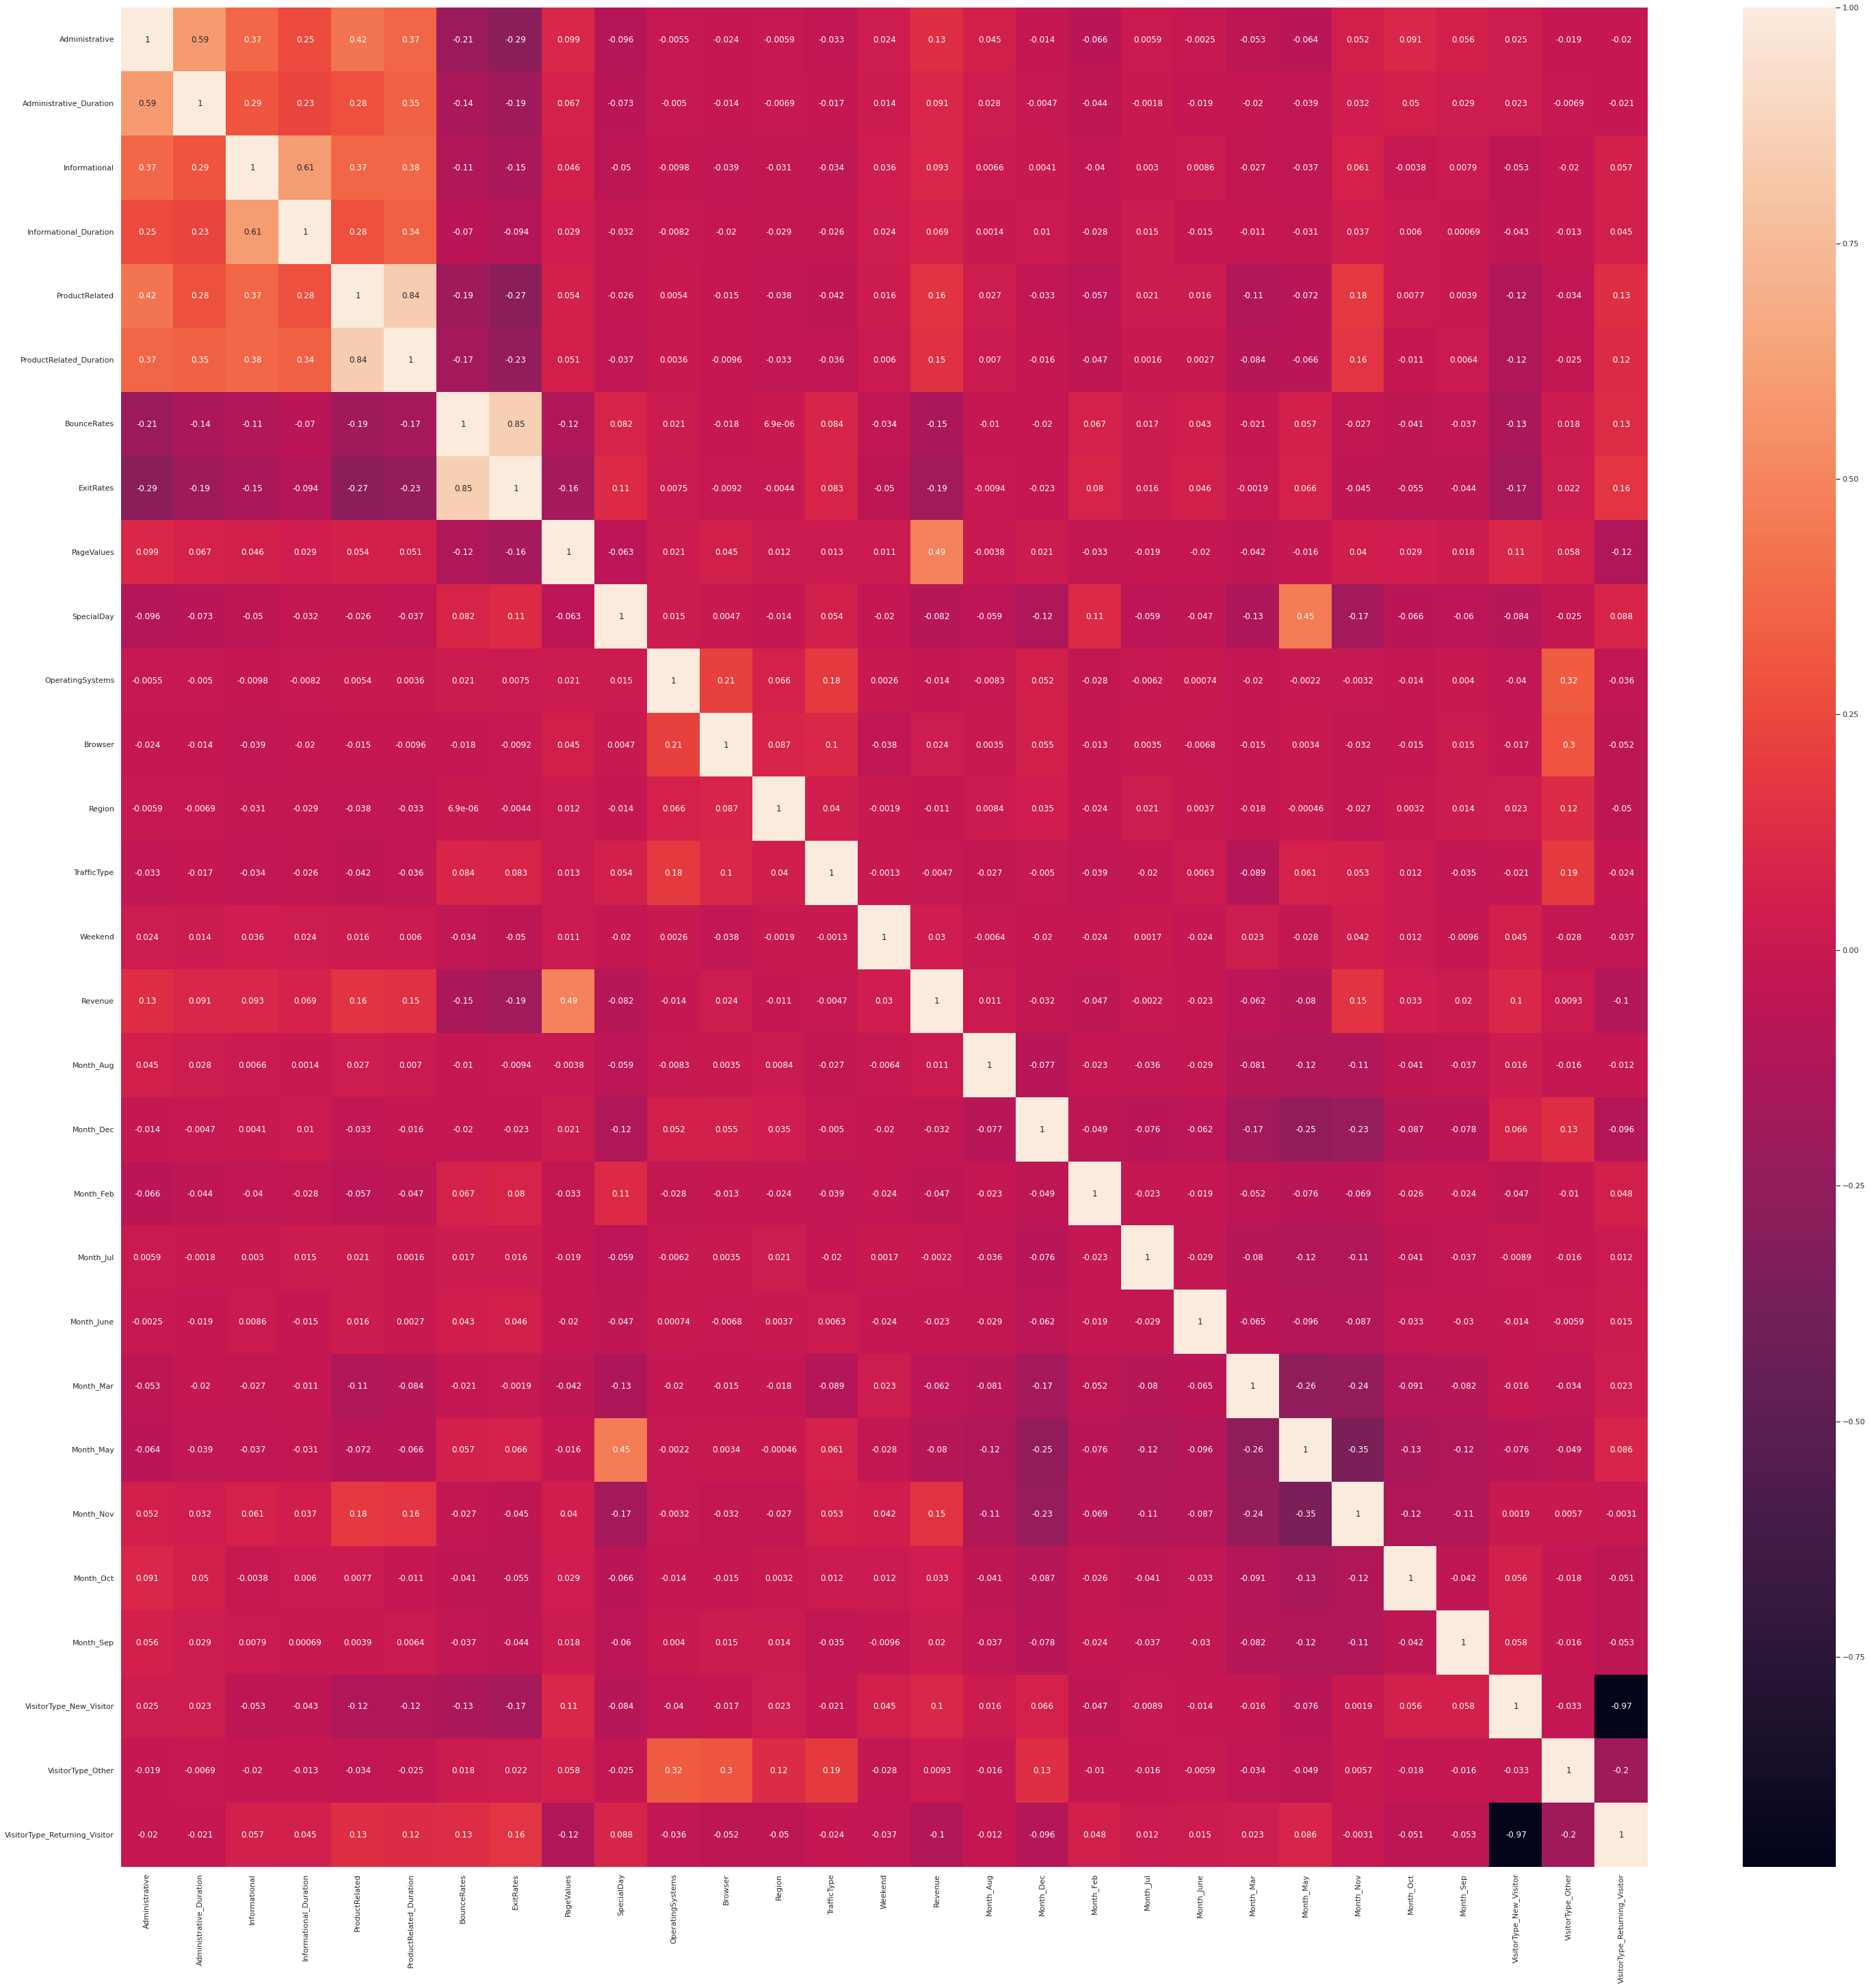

In [71]:
plt.figure(figsize=(50,50))
sns.heatmap(df_random_corr,annot=True,)
plt.show()

In [72]:
df_mode_corr=df_mode_cat.corr()
df_mode_corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
Administrative,1.000000,0.593133,0.370379,0.253828,0.424909,0.367031,-0.213058,-0.290493,0.099455,-0.096265,...,0.005919,-0.002540,-0.052795,-0.063877,0.051743,0.090691,0.056160,0.025251,-0.018932,-0.020387
Administrative_Duration,0.593133,1.000000,0.294075,0.234352,0.282117,0.345673,-0.137072,-0.188766,0.066810,-0.072782,...,-0.001798,-0.018782,-0.019997,-0.038582,0.031916,0.050416,0.028522,0.023396,-0.006893,-0.021348
Informational,0.370379,0.294075,1.000000,0.606714,0.365994,0.375536,-0.109624,-0.148071,0.045652,-0.049647,...,0.002964,0.008626,-0.026648,-0.037219,0.060570,-0.003804,0.007887,-0.052936,-0.020325,0.056599
Informational_Duration,0.253828,0.234352,0.606714,1.000000,0.279232,0.339326,-0.070313,-0.093778,0.029434,-0.031719,...,0.015224,-0.015127,-0.010994,-0.031348,0.036844,0.005975,0.000688,-0.043297,-0.012948,0.045444
ProductRelated,0.424909,0.282117,0.365994,0.279232,1.000000,0.843239,-0.192908,-0.272814,0.054146,-0.026241,...,0.020855,0.015624,-0.110801,-0.072026,0.179400,0.007658,0.003869,-0.123946,-0.034235,0.129438
ProductRelated_Duration,0.367031,0.345673,0.375536,0.339326,0.843239,1.000000,-0.174319,-0.233696,0.050645,-0.037361,...,0.001598,0.002732,-0.084127,-0.066227,0.163457,-0.010981,0.006366,-0.117653,-0.025294,0.121203
BounceRates,-0.213058,-0.137072,-0.109624,-0.070313,-0.192908,-0.174319,1.000000,0.850423,-0.115209,0.082488,...,0.016517,0.042958,-0.021103,0.057379,-0.026643,-0.041102,-0.036860,-0.133341,0.017798,0.126635
ExitRates,-0.290493,-0.188766,-0.148071,-0.093778,-0.272814,-0.233696,0.850423,1.000000,-0.158266,0.106064,...,0.015820,0.046289,-0.001927,0.066066,-0.045270,-0.054542,-0.044117,-0.169924,0.022102,0.161512
PageValues,0.099455,0.066810,0.045652,0.029434,0.054146,0.050645,-0.115209,-0.158266,1.000000,-0.062738,...,-0.018951,-0.020036,-0.042296,-0.016137,0.039545,0.029242,0.018207,0.105445,0.058249,-0.116843
SpecialDay,-0.096265,-0.072782,-0.049647,-0.031719,-0.026241,-0.037361,0.082488,0.106064,-0.062738,1.000000,...,-0.058509,-0.047287,-0.129789,0.454489,-0.173496,-0.066353,-0.059703,-0.084265,-0.025087,0.088417


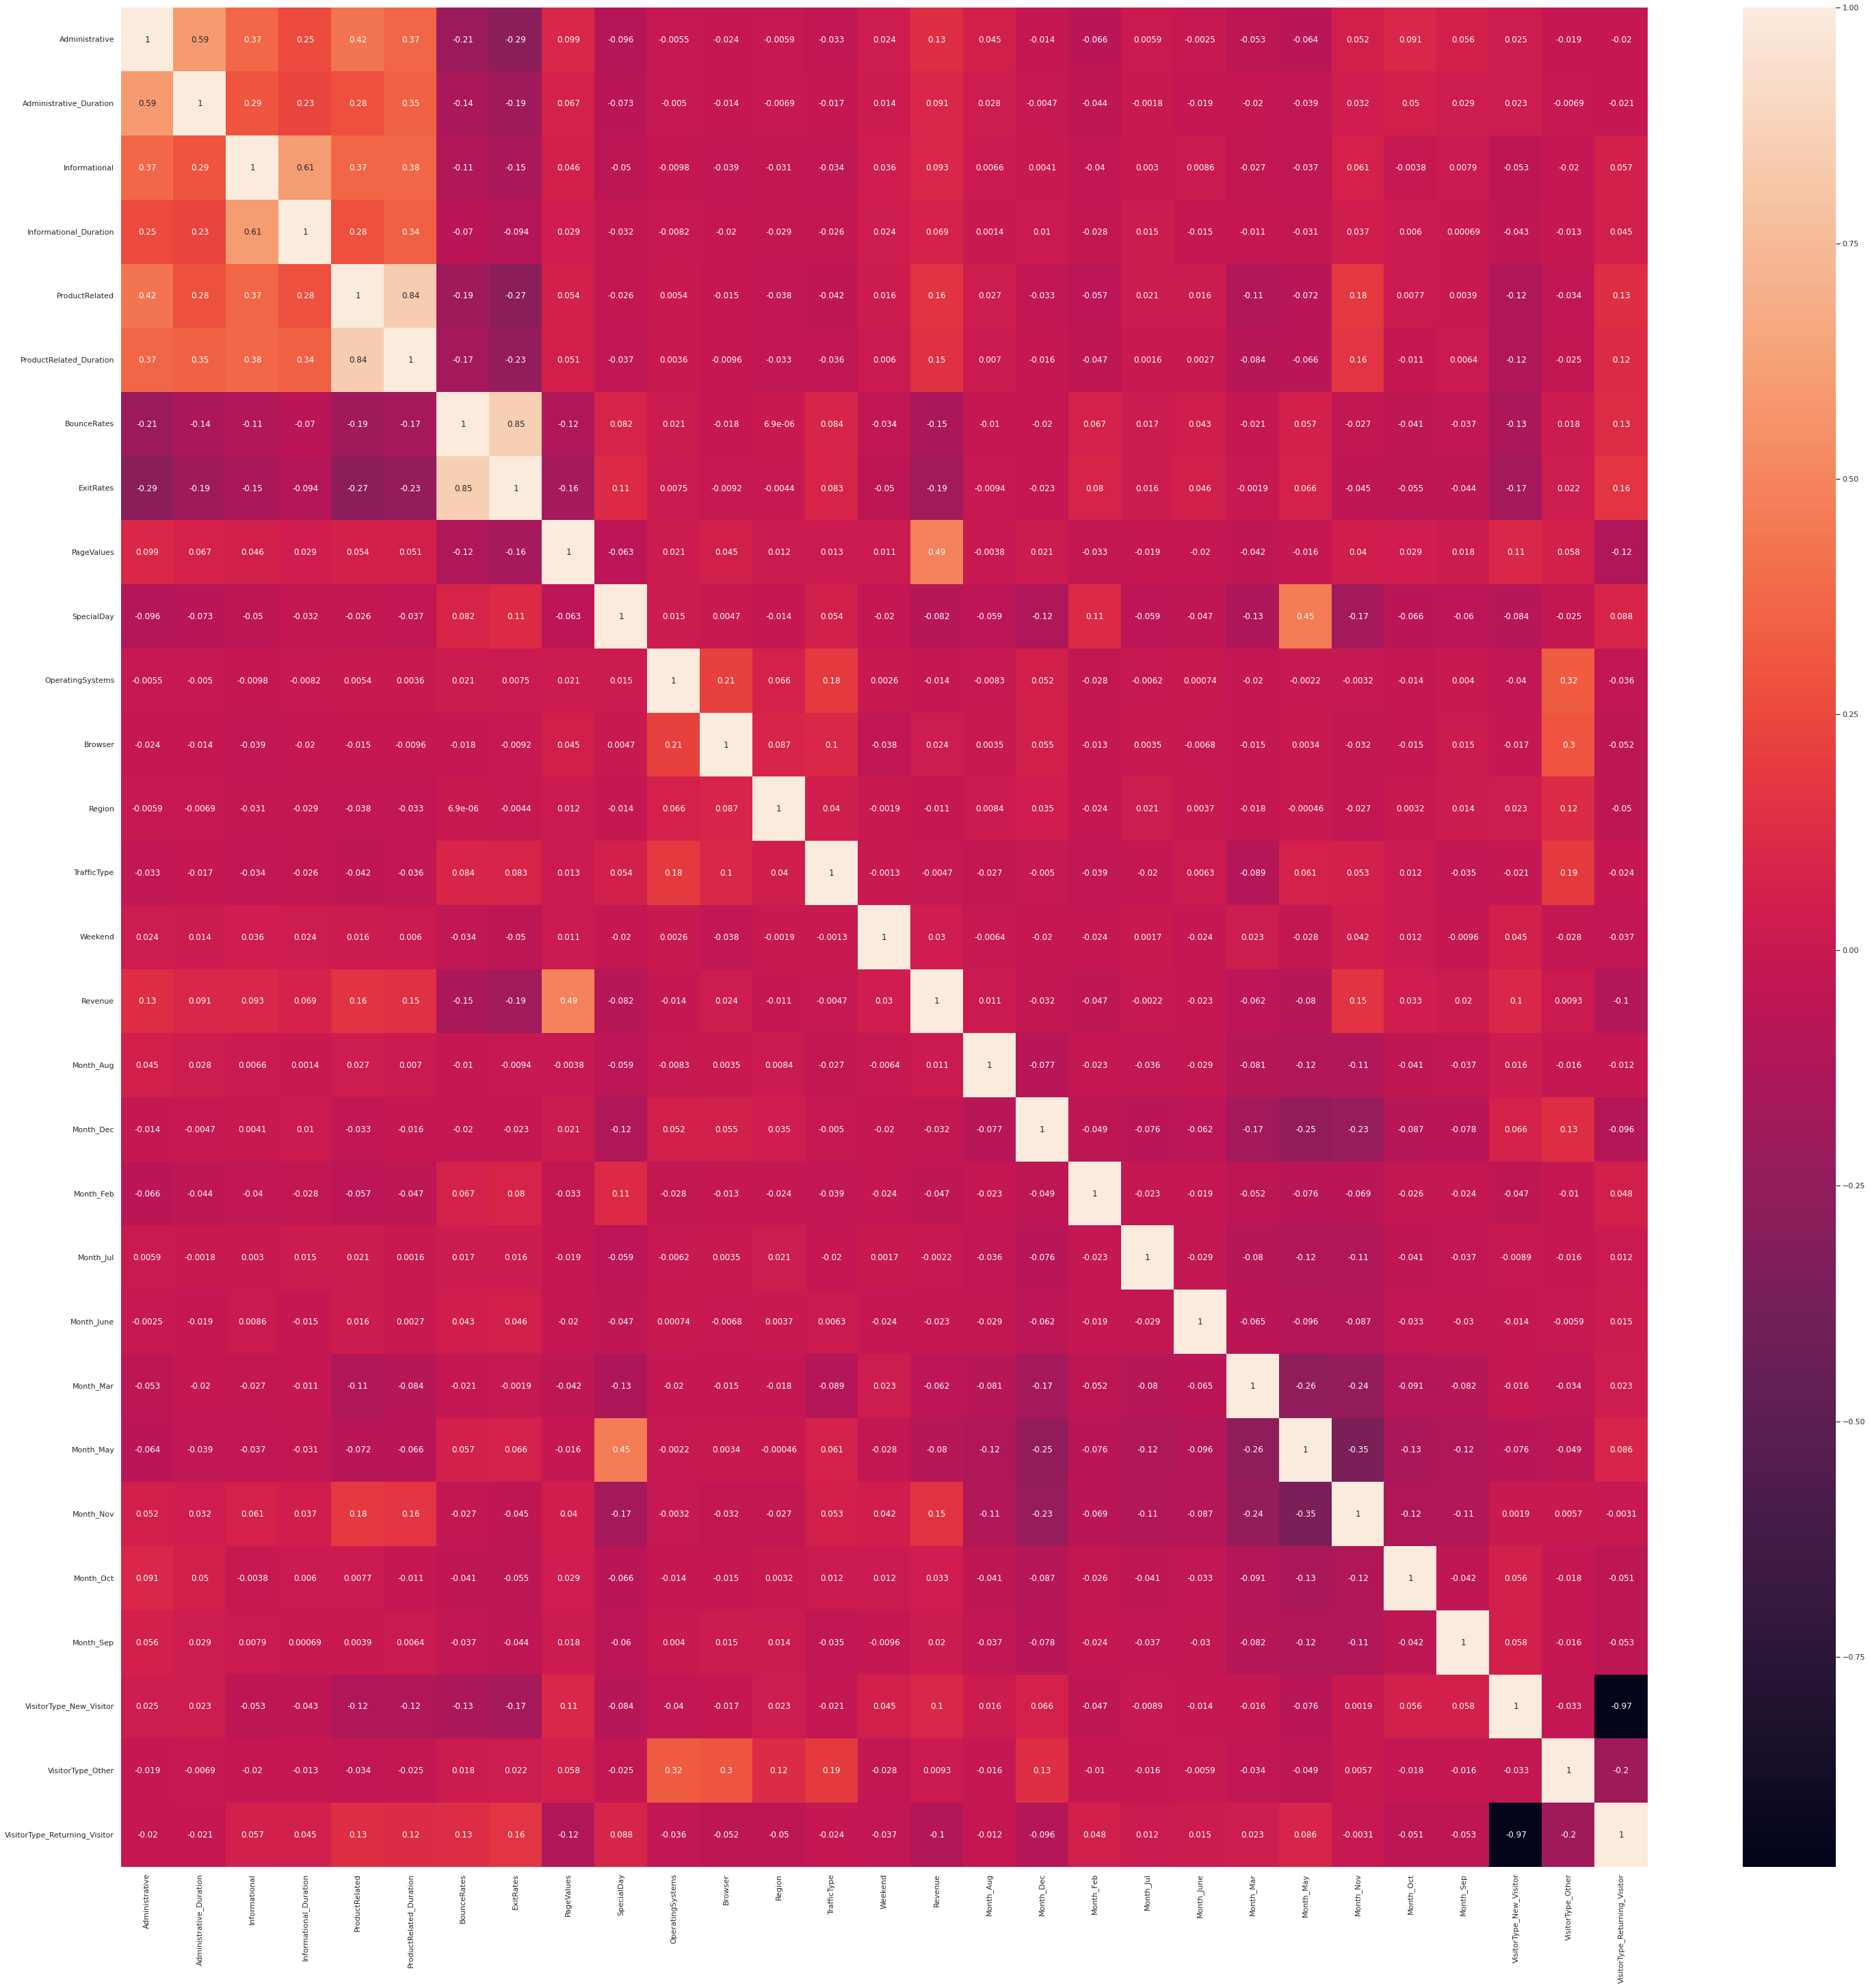

In [73]:
plt.figure(figsize=(50,50))
sns.heatmap(df_mode_corr,annot=True,)
plt.show()

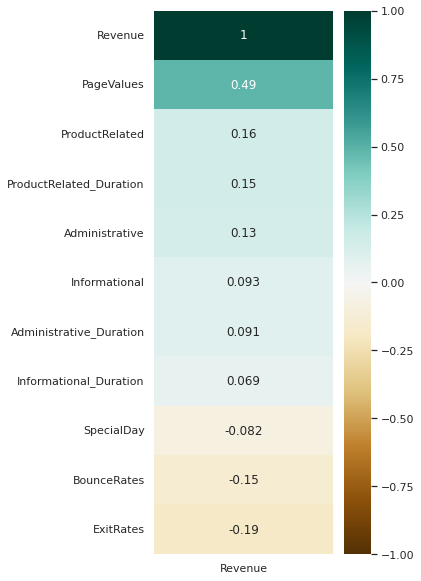

In [74]:
cat_columns = ['OperatingSystems', 'Region', 'TrafficType','Browser', 'Weekend', 'Month', 'VisitorType']
df_numerical = df_miss_mode.drop(cat_columns, axis=1)
plt.figure(figsize=(4, 10))
df_rel_mode = df_numerical.copy()
corrMatrix = df_rel_mode.corr()
sns.heatmap(corrMatrix[['Revenue']].sort_values(by="Revenue", ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

# 6.Testing Models

Trani Test Split

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import classification_report

In [76]:
# Test Train Split and Cross Validation methods
#importing train_test_split

In [77]:
def preprocessing(df,columns):
    df.dropna(inplace=True) 
    df.replace(['Returning_Visitor', 'New_Visitor','Other'],[1,2,3], inplace=True)
    df.replace(['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
    if columns!=[]: 
        df=df[columns]
    return df

In [78]:
def Split(df):
    X = df.drop('Revenue', axis=1)
    y = df['Revenue']
    obj_escalar = StandardScaler()
    X_standardization = obj_escalar.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
    return X_train, X_test, Y_train, Y_test

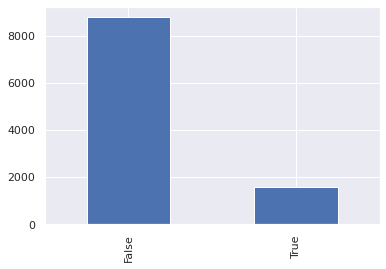

In [79]:
df=preprocessing(df,[])
X_train, X_test, Y_train, Y_test=Split(df)
df['Revenue'].value_counts().plot.bar()

In [80]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,2,1.0,1.0,1.0,1.0,1,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2.0,2.0,1.0,2.0,1,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,2,3.0,2.0,2.0,4.0,1,False,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,2,2.0,2.0,1.0,3.0,1,False,False
6,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,2,2.0,4.0,3.0,3.0,1,False,False


In [81]:
# The Data is imbalanced. There is a lot more 'Revenue = False' observations than 'Revenue = True'. We will therefore have to take it into account in our models.

Logestic Regression

In [82]:
model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_train, Y_train)
y_pred=model1.predict(X_test)
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_pred),3)))  
print("\nRecall\t{}".format(round(metrics.recall_score(Y_test, y_pred),3)))  
model1.get_params()


Accuracy	0.871

Recall	0.749


{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [83]:
#Find Best parameters using Grid Search

parametres = {"C": [0.001, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,0.07, 0.1]}
model1_gs = GridSearchCV(model1, param_grid=parametres,
                         cv = 10, scoring='accuracy')
model1_gs.fit(X_train, Y_train)
print(model1_gs.best_params_, "\nAcc: {}".format(round(model1_gs.best_score_,3)))

{'C': 0.001} 
Acc: 0.868


Best_parameter {'C': 0.001} 
Acc: 0.868


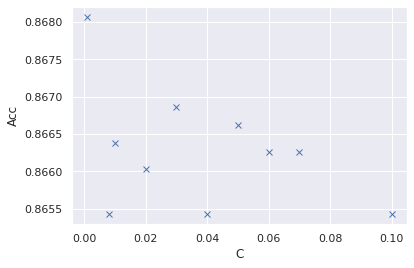

In [84]:
df_search = pd.DataFrame.from_dict(model1_gs.cv_results_)
plt.xlabel('C')
plt.ylabel('Acc')
_ = plt.plot(df_search['param_C'], df_search['mean_test_score'], 'x')
print('Best_parameter',model1_gs.best_params_, "\nAcc: {}".format(round(model1_gs.best_score_,3)))

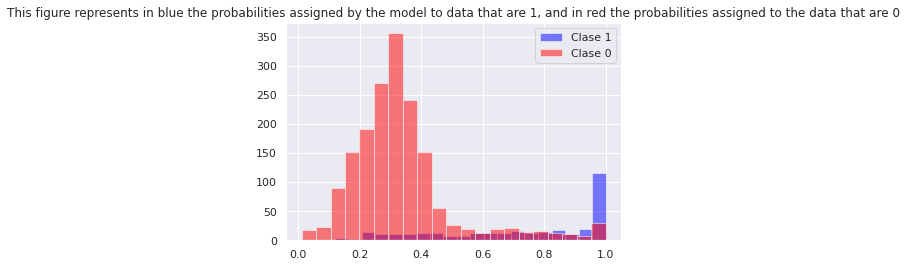

In [85]:
#Find Best threshold

model1 = LogisticRegression(class_weight='balanced', C=model1_gs.best_params_.get("C"))
model1.fit(X_train, Y_train)
y_test_pred_prob = model1.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

def representation_seuil(x_1, x_0, n_bins=11, title='This figure represents in blue the probabilities assigned by the model to data that are 1, and in red the probabilities assigned to the data that are 0', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='blue')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='red')
    plt.title(title)
    plt.legend(loc='best') 
    
representation_seuil(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, density=0) 

In [86]:
THRESHOLD = 0.5
y_THRESHOLD = 1*(y_test_pred_prob[:, 1] > THRESHOLD)

print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_THRESHOLD))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_THRESHOLD),3)))  
print("Sensitivity\t{}".format(round(metrics.recall_score(Y_test, y_THRESHOLD),3)))
print(u"Precision\t{}".format(round(metrics.precision_score(Y_test, y_THRESHOLD),3)))

Matriz de confusión
 [[1562  179]
 [  85  250]]

Accuracy	0.873
Sensitivity	0.746
Precision	0.583


In [87]:
THRESHOLD = 0.6
y_THRESHOLD = 1*(y_test_pred_prob[:, 1] > THRESHOLD)

print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_THRESHOLD))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_THRESHOLD),3)))  
print("Sensitivity\t{}".format(round(metrics.recall_score(Y_test, y_THRESHOLD),3)))
print(u"Precision\t{}".format(round(metrics.precision_score(Y_test, y_THRESHOLD),3)))

Matriz de confusión
 [[1600  141]
 [ 105  230]]

Accuracy	0.882
Sensitivity	0.687
Precision	0.62


In [88]:
THRESHOLD = 0.55
y_THRESHOLD = 1*(y_test_pred_prob[:, 1] > THRESHOLD)

print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_THRESHOLD))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_THRESHOLD),3)))  
print("Sensitivity\t{}".format(round(metrics.recall_score(Y_test, y_THRESHOLD),3)))
print(u"Precision\t{}".format(round(metrics.precision_score(Y_test, y_THRESHOLD),3)))

Matriz de confusión
 [[1585  156]
 [  94  241]]

Accuracy	0.88
Sensitivity	0.719
Precision	0.607


We will keep the threshold of 0.55 which allows to have a good trade-off between accuracy and recall



Feature: Administrative Score: 0.021798269303906166
Feature: Administrative_Duration Score: -4.451106124185227e-05
Feature: Informational Score: 0.014397518806613222
Feature: Informational_Duration Score: 0.00013793732566500118
Feature: ProductRelated Score: 0.00214542830974209
Feature: ProductRelated_Duration Score: 0.00010264699956555295
Feature: BounceRates Score: -0.0030659669319144153
Feature: ExitRates Score: -0.004459126378842932
Feature: PageValues Score: 0.1195014885872288
Feature: SpecialDay Score: -0.01039673937475787
Feature: Month Score: 0.0035378352273628933
Feature: OperatingSystems Score: -0.089421608965249
Feature: Browser Score: -0.08242747417027087
Feature: Region Score: -0.10947658769482324
Feature: TrafficType Score: -0.08109286462516471
Feature: VisitorType Score: -0.03745074564613776
Feature: Weekend Score: -0.001495087025369643


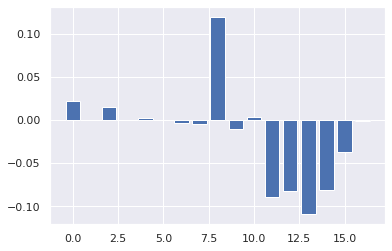

['PageValues', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

In [89]:
#which variables contribute the most to the model

importance = model1.coef_[0]
important_features=[]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature:',df.columns[i],'Score:', v)
    if (v>0.04 or v<-0.04):
        important_features.append(df.columns[i])
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

important_features

We are keeping features that score> 0.04 or <-0.04 to see if our model's performance will improve.



In [90]:
sheet_id = '1wV3qg-i_Aw58lqpM1-pqsd5Exq3OTSChqhF24_Fl3ic'
sheet_name = 'Online-shopping'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)


In [91]:
columns=important_features+['Revenue']
df_less_features=preprocessing(df,columns)
X_train, X_test, Y_train, Y_test=Split(df_less_features)

In [92]:
model1 = LogisticRegression(class_weight='balanced')
parametres = {"C": [0.001, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,0.07, 0.1]}
model1_gs = GridSearchCV(model1, param_grid=parametres,
                         cv = 10, scoring='accuracy')
model1_gs.fit(X_train, Y_train)
print(model1_gs.best_params_, "\nAcc: {}".format(round(model1_gs.best_score_,3)))

{'C': 0.001} 
Acc: 0.891


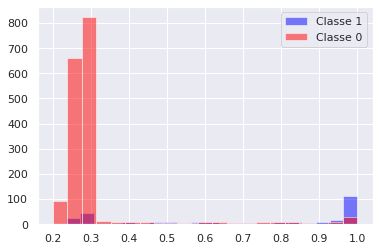

In [93]:
model1 = LogisticRegression(class_weight='balanced', C=model1_gs.best_params_.get("C"))
model1.fit(X_train, Y_train)
y_test_pred_prob = model1.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

def representation_seuil(x_1, x_0, n_bins=11, title='', label_1='Classe 1', 
                          label_0='Classe 0', density=0):
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='blue')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='red')
    plt.title(title)
    plt.legend(loc='best') 
    
representation_seuil(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, density=0) 

In [94]:
THRESHOLD = 0.5
y_threshold = 1*(y_test_pred_prob[:, 1] > THRESHOLD)

print(u"Matriz de confusion\n", metrics.confusion_matrix(Y_test, y_threshold))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_threshold),3)))  
print("Sensitivity\t{}".format(round(metrics.recall_score(Y_test, y_threshold),3)))
print(u"Precision\t{}".format(round(metrics.precision_score(Y_test, y_threshold),3)))

Matriz de confusion
 [[1623  118]
 [ 115  220]]

Accuracy	0.888
Sensitivity	0.657
Precision	0.651


In [95]:
THRESHOLD = 0.6
y_threshold = 1*(y_test_pred_prob[:, 1] > THRESHOLD)

print(u"Matriz de confusion\n", metrics.confusion_matrix(Y_test, y_threshold))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_threshold),3)))  
print("Sensitivity\t{}".format(round(metrics.recall_score(Y_test, y_threshold),3)))
print(u"Precision\t{}".format(round(metrics.precision_score(Y_test, y_threshold),3)))

Matriz de confusion
 [[1642   99]
 [ 133  202]]

Accuracy	0.888
Sensitivity	0.603
Precision	0.671


In [96]:
THRESHOLD = 0.55
y_threshold = 1*(y_test_pred_prob[:, 1] > THRESHOLD)

print(u"Matriz de confusion\n", metrics.confusion_matrix(Y_test, y_threshold))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_threshold),3)))  
print("Sensitivity\t{}".format(round(metrics.recall_score(Y_test, y_threshold),3)))
print(u"Precision\t{}".format(round(metrics.precision_score(Y_test, y_threshold),3)))

Matriz de confusion
 [[1630  111]
 [ 124  211]]

Accuracy	0.887
Sensitivity	0.63
Precision	0.655


We will keep the threshold of 0.5 which allows us to have the best deal between accuracy and recall.
We can observe that when we relaunch the model with only the most important features, we get better results. The other variables therefore made noise in the previous model.
We thus obtain in our best logistic regression model: 0,89 accuracy, 0,70 recall.

### RANDOM FOREST

In [97]:
model2 = RandomForestClassifier(n_estimators = 30,max_depth = 10,random_state = 101)
model2.fit(X_train,Y_train)
pred = model2.predict(X_test)
print('Results Random Forest with no optimization')
print(classification_report(Y_test,pred))
print(model2.score(X_test,Y_test))

Results Random Forest with no optimization
              precision    recall  f1-score   support

       False       0.91      0.95      0.93      1741
        True       0.66      0.53      0.59       335

    accuracy                           0.88      2076
   macro avg       0.79      0.74      0.76      2076
weighted avg       0.87      0.88      0.88      2076

0.8805394990366089


In [98]:
# Optimization of the Random Forest Classifier using GridSearch

In [99]:
param_grid = {
    'n_estimators' : [60,100],
    'max_depth' : [10,15],
    'min_samples_leaf' : [2,4],
    'min_samples_split': [2,4]
}

gridsearch = GridSearchCV(estimator=model2,param_grid=param_grid,verbose = 1)
gridsearch.fit(X_train,Y_train)
gridsearch.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 60}

In [100]:
model2 = RandomForestClassifier(n_estimators = 60,max_depth = 10,min_samples_leaf = 3, min_samples_split = 2,random_state = 101)
model2.fit(X_train,Y_train)
pred = model2.predict(X_test)
print(classification_report(Y_test,pred))

from sklearn.metrics import accuracy_score
Acc = accuracy_score(Y_test,pred)
print('Accuracy',Acc)

              precision    recall  f1-score   support

       False       0.91      0.95      0.93      1741
        True       0.66      0.53      0.59       335

    accuracy                           0.88      2076
   macro avg       0.79      0.74      0.76      2076
weighted avg       0.87      0.88      0.88      2076

Accuracy 0.8810211946050096


Oversampling 

In [101]:
from imblearn.over_sampling import RandomOverSampler

In [102]:
X = df.drop(["Revenue"],axis=1)
y = df["Revenue"]

In [103]:
os =  RandomOverSampler(0.85)
X_train_res, y_train_res = os.fit_resample(X,y)
X_train_res.shape,y_train_res.shape

((16237, 17), (16237,))

In [104]:
from collections import Counter

In [105]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({False: 8777, True: 1599})
Resampled dataset shape Counter({False: 8777, True: 7460})


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Decsion Tree 

In [107]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.868029197080292

SVM

In [108]:
from sklearn import svm
clf = svm.SVC(kernel="rbf")
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8464233576642336

In [109]:
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7722627737226277

K- Mean Method

In [110]:
from sklearn.cluster import KMeans

In [111]:
x = df_miss_mode.iloc[:, [5, 6]].values

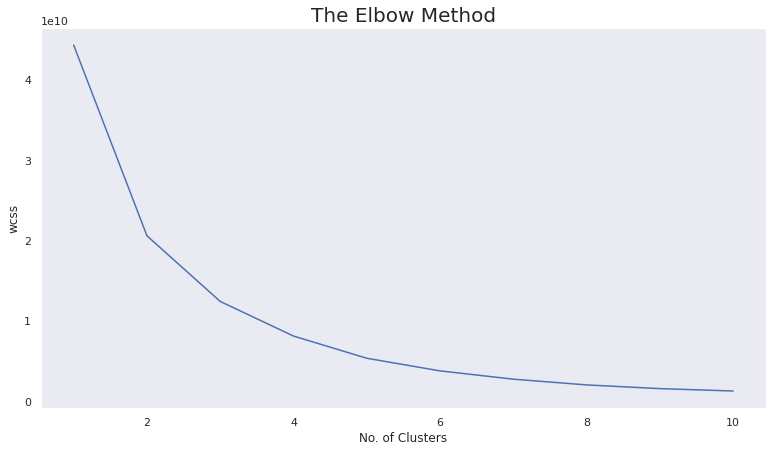

In [112]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0, algorithm='full', tol=0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

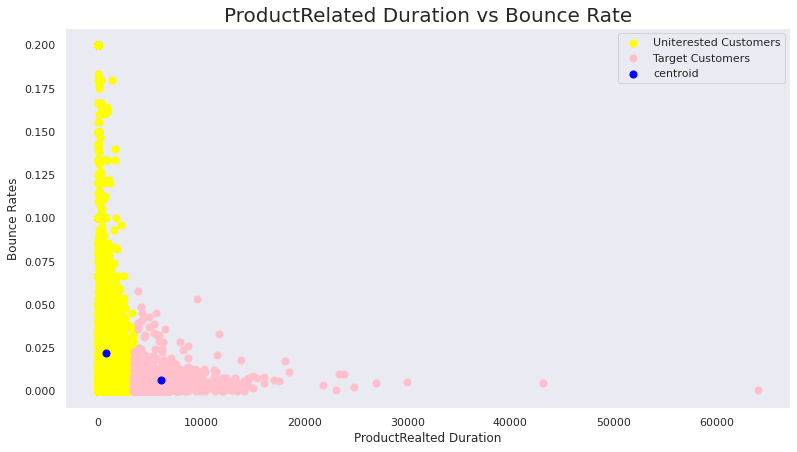

In [113]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='yellow',label='Uniterested Customers')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='pink',label='Target Customers')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label='centroid')

plt.title('ProductRelated Duration vs Bounce Rate', fontsize=20)
plt.grid()
plt.xlabel('ProductRealted Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

KNN Methond

In [114]:
from sklearn.neighbors import KNeighborsClassifier 

In [115]:
 knn = KNeighborsClassifier(n_neighbors = 17)

In [116]:
knn.fit(X_train, y_train) 
pred = knn.predict(X_test) 

In [117]:
from sklearn.metrics import classification_report, confusion_matrix 

In [118]:
! pip install scikit-plot
import scikitplot as skplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


              precision    recall  f1-score   support

       False       0.87      0.99      0.92      2903
        True       0.71      0.16      0.26       522

    accuracy                           0.86      3425
   macro avg       0.79      0.57      0.59      3425
weighted avg       0.84      0.86      0.82      3425



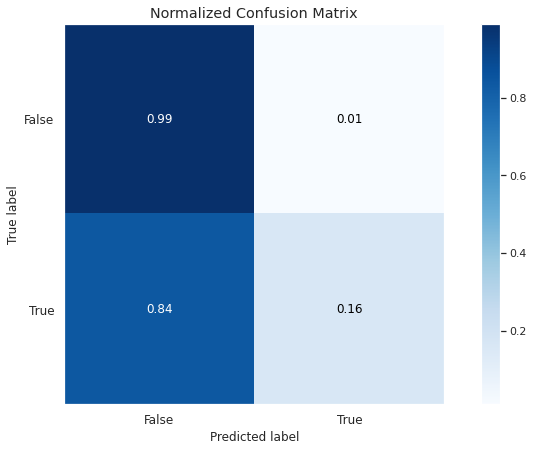

In [119]:
plt_knn = skplt.metrics.plot_confusion_matrix(y_test,pred, normalize=True)
print(classification_report(y_test, pred)) 

TP is good but FN is also high value, we need to correct that.


We can use ROC curve to increase calue of recall.

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.87716763 0.86650602 0.85108434 0.83277108 0.84481928]
cv_scores mean:0.854469670589874


In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [124]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 10}

In [125]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8636267149522947

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
dtree = DecisionTreeClassifier()

In [128]:
print(cross_val_score(dtree, X, y, scoring="precision", cv = 7))
mean_score = cross_val_score(dtree, X, y, scoring="precision", cv = 7).mean()
std_score = cross_val_score(dtree, X, y, scoring="precision", cv = 7).std()
print(mean_score)
print(std_score)

[0.79591837 0.77514793 0.6010101  0.46428571 0.34006734 0.44816054
 0.3785489 ]
0.5475501049853694
0.16746047892967675
